## Problem Statement

In today’s competitive job market, retaining skilled employees—especially in fast-growing fields like data science—is a significant challenge for companies. Hiring and training new employees is costly and time-consuming. Therefore, predicting which employees are likely to leave their jobs can help HR departments take proactive measures to improve retention.

This project aims to build a predictive model that determines the likelihood of a data scientist switching jobs. Using machine learning techniques, we analyze various features like education level, experience, training hours, company type, etc., to make an informed prediction.

## Why are we doing this?


**Business Need**
* Reduce attrition costs: Losing employees disrupts productivity and is expensive.

* Targeted retention efforts: HR can focus on employees most likely to leave.

* Better hiring decisions: Understand which candidate profiles are likely to stay long-term.

**Academic and Technical Goals**
* Apply a full ML pipeline: From EDA and preprocessing to model selection and deployment.

* Handle class imbalance using SMOTE.

* Use advanced algorithms like Logistic Regression, XGBoost, LightGBM.

* Perform feature engineering, model evaluation, and SHAP-based interpretability.

## Appendix

**A. Dataset Description**
* Enrollee_id : Unique ID for enrollee
* City: City code
* Citydevelopmentindex: Developement index of the city (scaled)
* Gender: Gender of enrolee
* Relevent_experience: Relevent experience of enrolee
* Enrolled_university: Type of University course enrolled if any
*Education_level: Education level of enrolee
* Major_discipline :Education major discipline of enrolee
* Experience: Enrolee total experience in years
* Company_size: No of employees in current employer's company
* Company_type : Type of current employer
* Lastnewjob: Difference in years between previous job and current job
* Training_hours: training hours completed
* Target:
 * 0 – Not looking for job change,
 * 1 – Looking for a job change



**B. Tools & Technologies**
* Python (Pandas, NumPy, Scikit-learn, Imbalanced-learn)

* Machine Learning: Logistic Regression, Random Forest, XGBoost, LightGBM

* Hyperparameter Tuning: GridSearchCV

* Model Explainability: SHAP

* Deployment: Flask (for optional web app)

* EDA & Visualization: Seaborn, Matplotlib

**C. Performance Metrics Used**
* ROC-AUC Score: To evaluate model's ability to distinguish classes

* Confusion Matrix: To analyze true/false positives and negatives

* Classification Report: Precision, Recall, F1-Score

* Feature Importance (Model & SHAP): To understand feature contribution

**D. Preprocessing Steps**
* Label Encoding for binary categories

* One-Hot Encoding for nominal categorical features

* Missing value handling using SimpleImputer

* Standardization using StandardScaler

* Imbalanced data handled using SMOTE

**E. Model Comparison Summary**
(Model	ROC-AUC Score)
* Logistic Regression	0.72
* Random Forest	0.77
* XGBoost	0.78
* LightGBM	**0.81**



## Library Import


In [117]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer

# For handling imbalanced data
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import lightgbm as lgb

# For model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score

## Data File Load

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
df = pd.read_csv("/content/drive/My Drive/aug_train.csv")

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [121]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## EDA

In [122]:
#missing_values
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


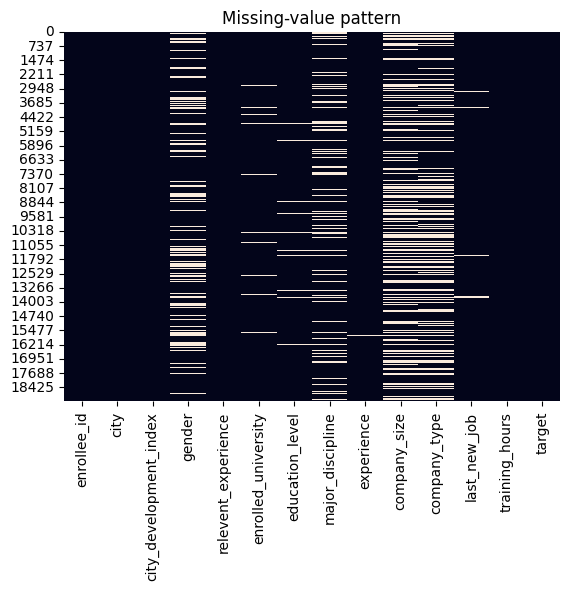

In [123]:
# missing-value heatmap
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing-value pattern"); plt.show()

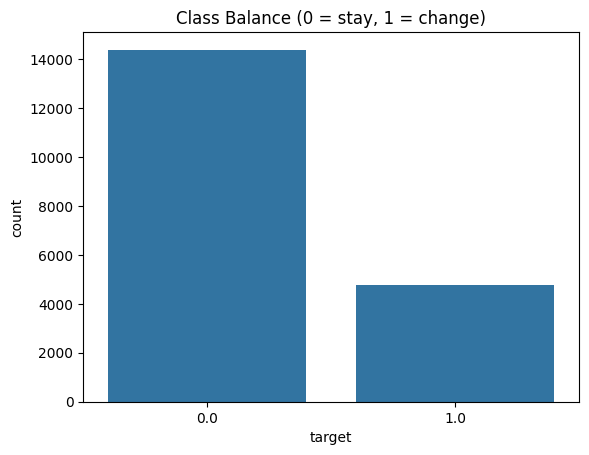

In [124]:
# target balance
sns.countplot(x="target", data=df)
plt.title("Class Balance (0 = stay, 1 = change)")
plt.show()

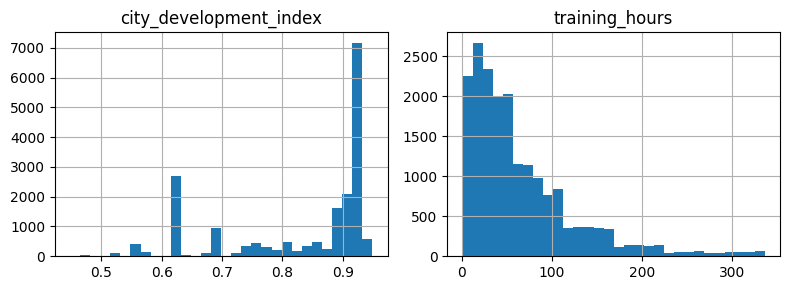

In [125]:
#numerical distros
num_cols = ["city_development_index", "training_hours"]
df[num_cols].hist(bins=30, figsize=(8,3))
plt.tight_layout(); plt.show()

In [126]:
# Percentage distribution
print(df['target'].value_counts(normalize=True) * 100)

target
0.0    75.065247
1.0    24.934753
Name: proportion, dtype: float64


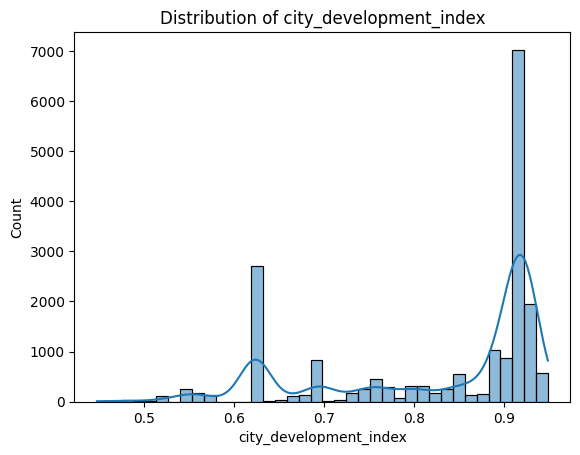

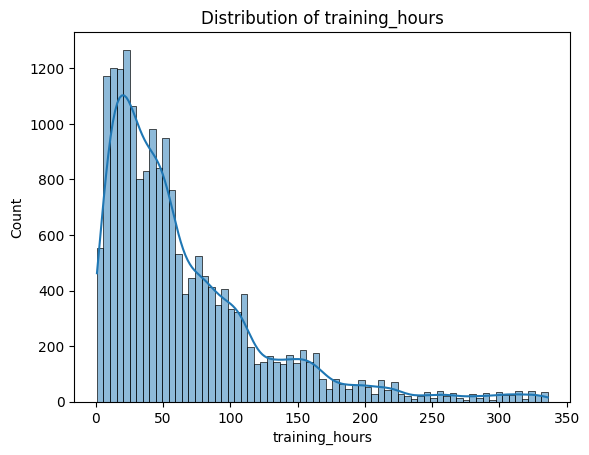

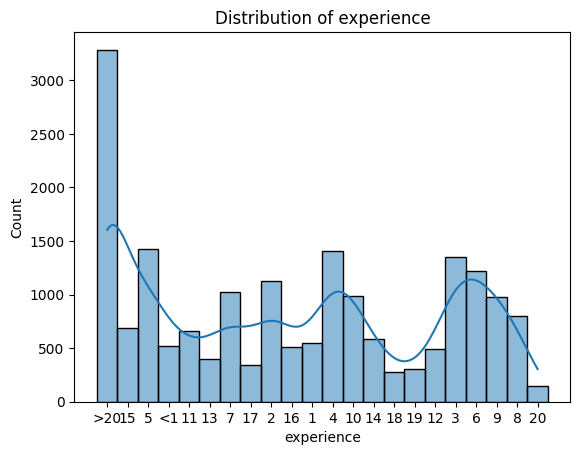

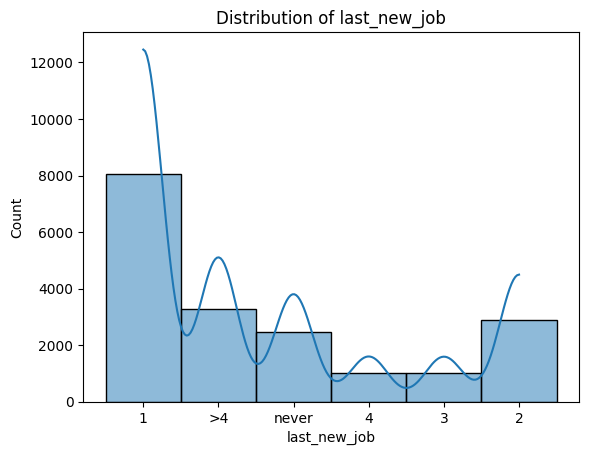

In [127]:
num_cols = ['city_development_index', 'training_hours', 'experience', 'last_new_job']

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

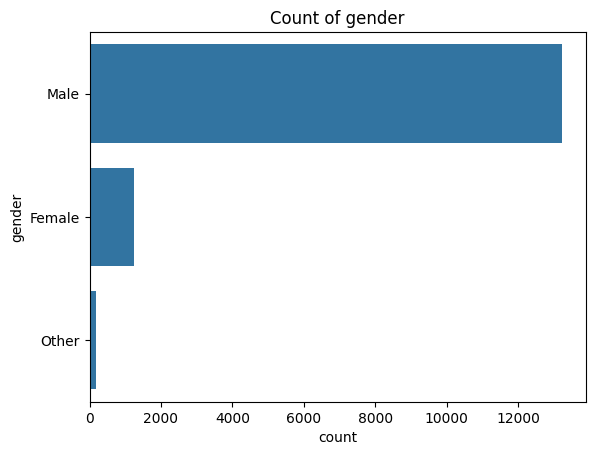

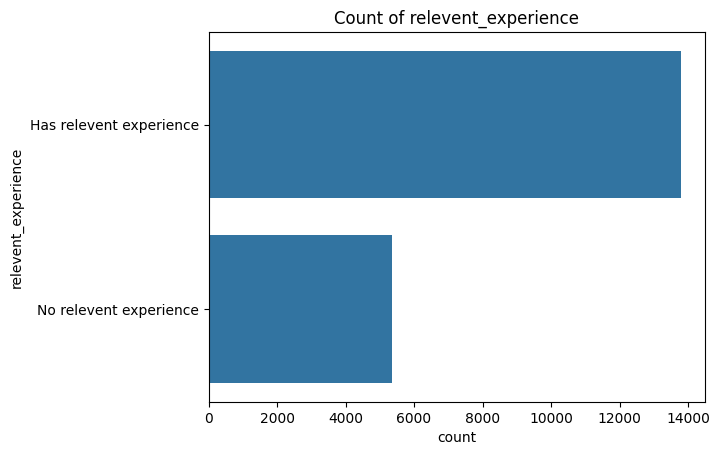

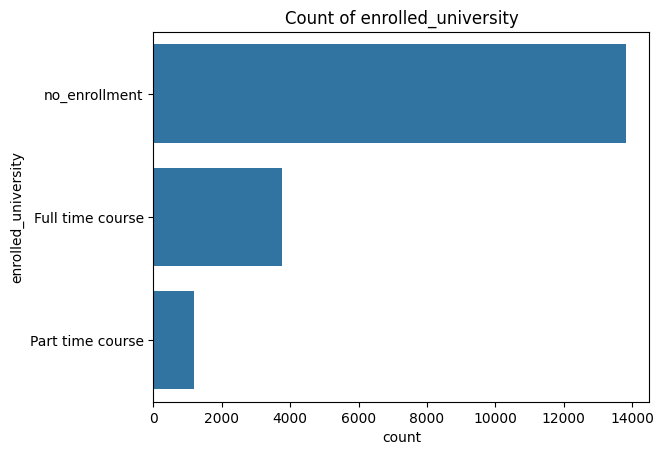

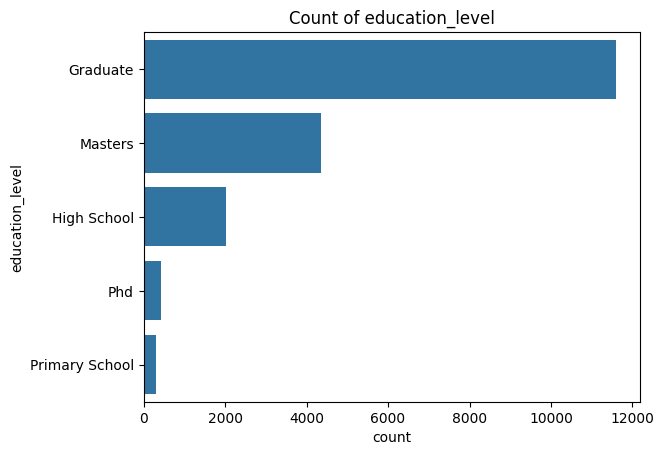

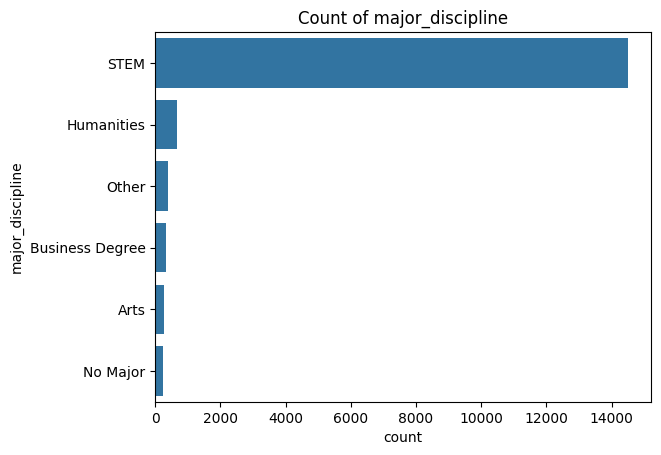

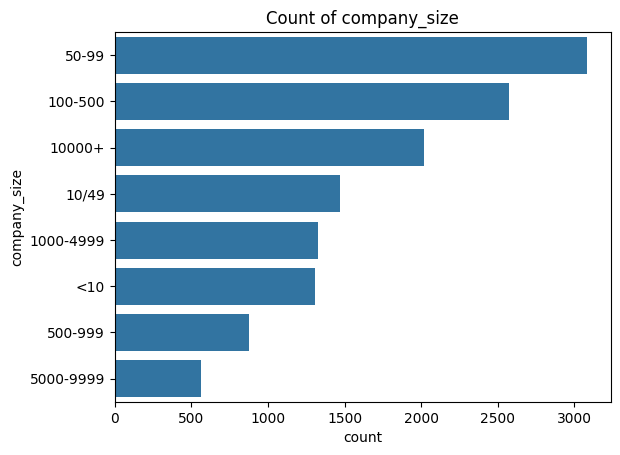

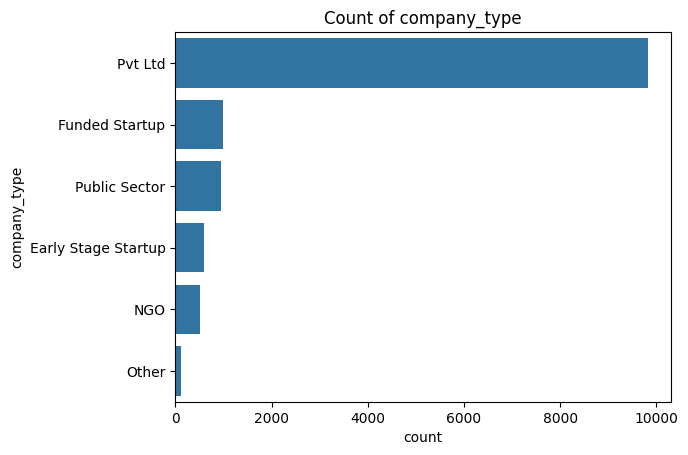

In [128]:
cat_cols = ['gender', 'relevent_experience', 'enrolled_university',
            'education_level', 'major_discipline', 'company_size',
            'company_type']

for col in cat_cols:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

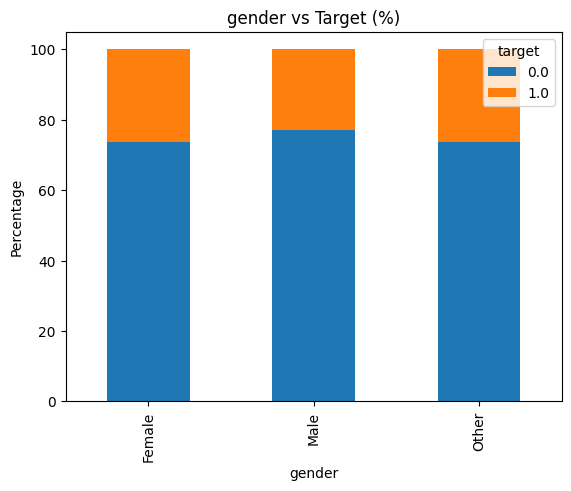

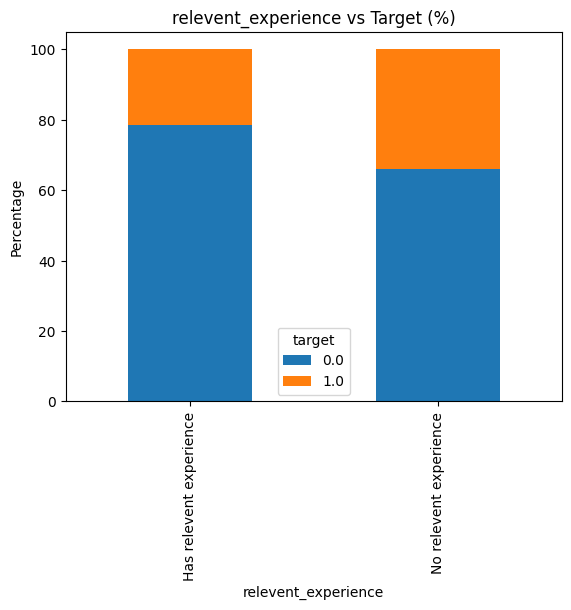

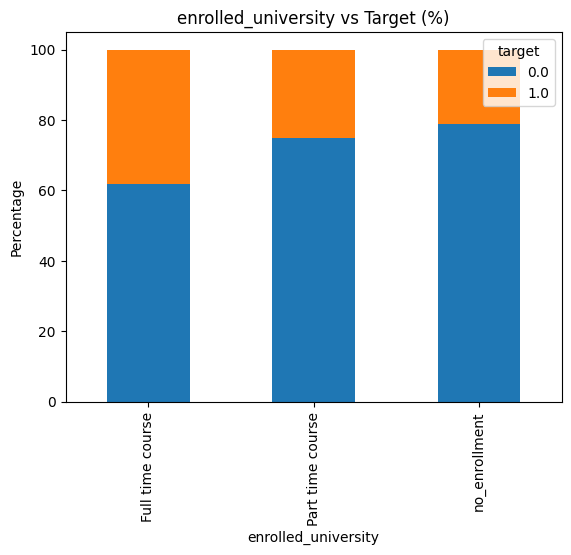

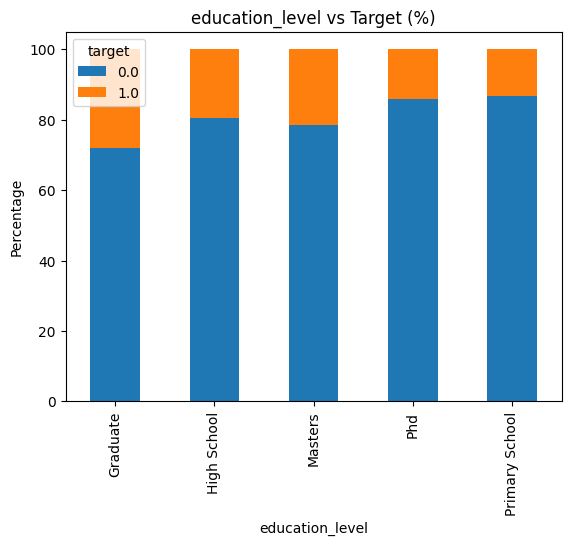

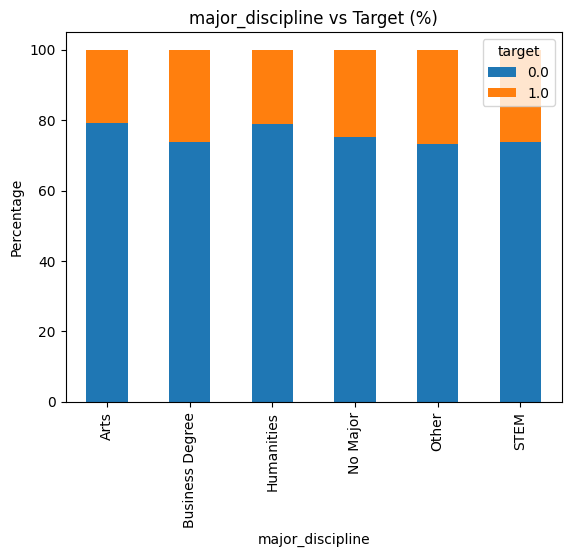

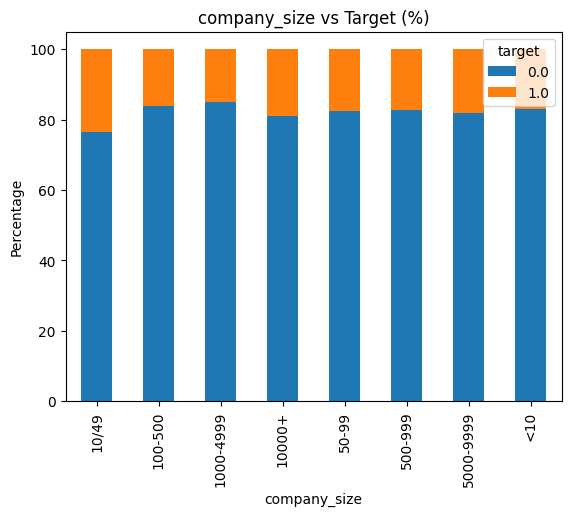

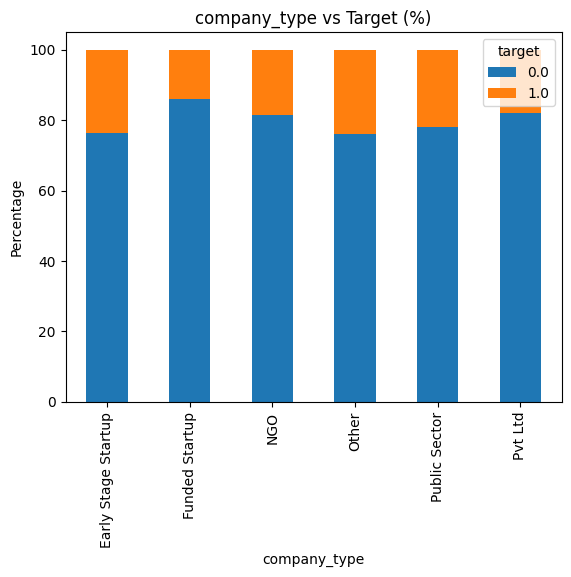

In [79]:
for col in cat_cols:
    cross_tab = pd.crosstab(df[col], df['target'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Target (%)')
    plt.ylabel('Percentage')
    plt.show()

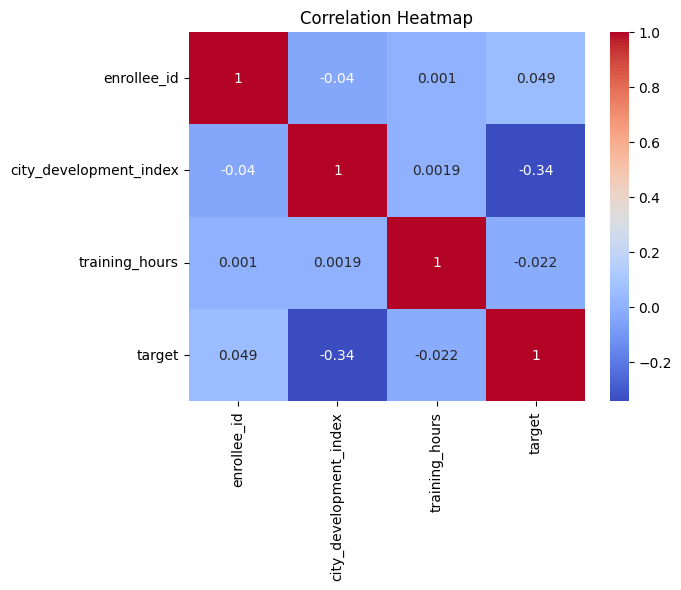

In [80]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

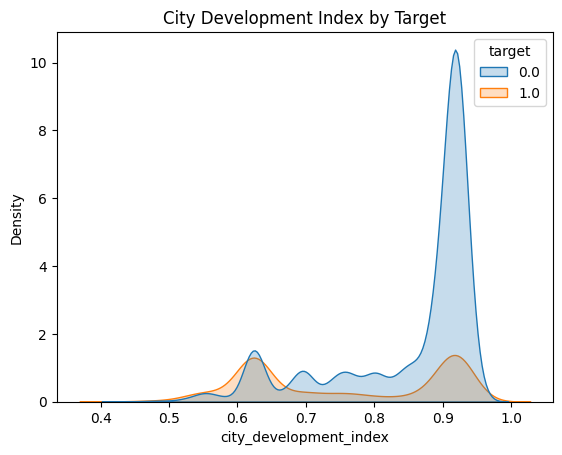

In [81]:
sns.kdeplot(data=df, x="city_development_index", hue="target", fill=True)
plt.title("City Development Index by Target")
plt.show()

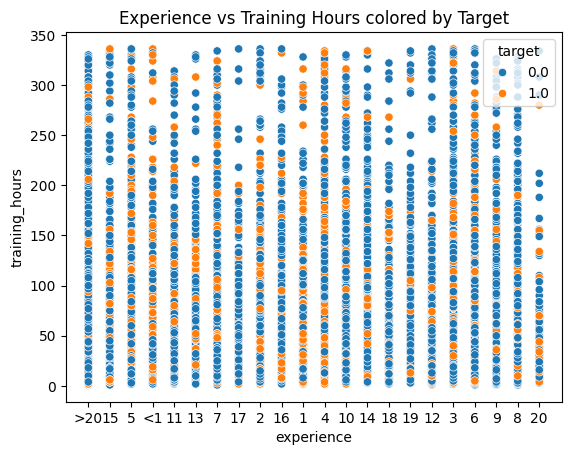

In [82]:
sns.scatterplot(x="experience", y="training_hours", hue="target", data=df)
plt.title("Experience vs Training Hours colored by Target")
plt.show()

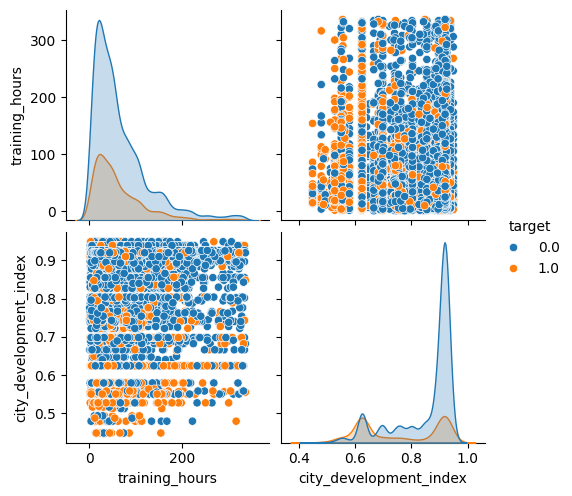

In [83]:
import seaborn as sns
sns.pairplot(df[["experience", "training_hours", "city_development_index", "last_new_job", "target"]], hue='target')
plt.show()

## Data Preprocesing


In [84]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [85]:
df.loc[df['last_new_job'] == 'never', 'last_new_job'] = 0
df.loc[df['last_new_job'] == '>4', 'last_new_job'] = 5

In [86]:
df['last_new_job'] = df['last_new_job'].astype(float)

In [87]:
df['last_new_job'] = df['last_new_job'].fillna(0)

In [88]:
df.loc[df['experience'] == '>20', 'experience'] = 21
df.loc[df['experience'] == '<1', 'experience'] = 0
df['experience'] = df['experience'].astype(float)

In [89]:
df['experience'] = df['experience'].fillna(0)

In [90]:
cat_cols = ["gender", "enrolled_university", "education_level",
            "major_discipline", "company_size", "company_type"]

for col in cat_cols:
    df[col] = df[col].fillna("none")

In [91]:
le = LabelEncoder()
df['enrolled_university'] = le.fit_transform(df['enrolled_university'].astype(str))

In [92]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Full time course': np.int64(0), 'Part time course': np.int64(1), 'no_enrollment': np.int64(2), 'none': np.int64(3)}


In [93]:
df['education_level'] = le.fit_transform(df['education_level'].astype(str))

In [94]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Graduate': np.int64(0), 'High School': np.int64(1), 'Masters': np.int64(2), 'Phd': np.int64(3), 'Primary School': np.int64(4), 'none': np.int64(5)}


In [95]:
df['company_type'] = le.fit_transform(df['company_type'].astype(str))

In [96]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Early Stage Startup': np.int64(0), 'Funded Startup': np.int64(1), 'NGO': np.int64(2), 'Other': np.int64(3), 'Public Sector': np.int64(4), 'Pvt Ltd': np.int64(5), 'none': np.int64(6)}


In [97]:
df = pd.get_dummies(df, columns=['gender'], prefix='gender', drop_first=True)

In [98]:
df = pd.get_dummies(df, columns=['relevent_experience'], prefix='exp', drop_first=True)

In [99]:
df['major_discipline'] = le.fit_transform(df['major_discipline'].astype(str))

In [100]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Arts': np.int64(0), 'Business Degree': np.int64(1), 'Humanities': np.int64(2), 'No Major': np.int64(3), 'Other': np.int64(4), 'STEM': np.int64(5), 'none': np.int64(6)}


In [101]:
df.drop("enrollee_id", axis=1, inplace=True)

In [102]:
df['city'] = df['city'].str.replace("city_","").astype(int)

In [103]:
df

,city,city_development_index,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male,gender_Other,gender_none,exp_No relevent experience
0,103,0.920,2,0,5,21.0,none,6,1.0,36,1.0,True,False,False,False
1,40,0.776,2,0,5,15.0,50-99,5,5.0,47,0.0,True,False,False,True
2,21,0.624,0,0,5,5.0,none,6,0.0,83,0.0,False,False,True,True
3,115,0.789,3,0,1,0.0,none,5,0.0,52,1.0,False,False,True,True
4,162,0.767,2,2,5,21.0,50-99,1,4.0,8,0.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,2,0,2,14.0,none,6,1.0,42,1.0,True,False,False,True
19154,103,0.920,2,0,5,14.0,none,6,4.0,52,1.0,True,False,False,False
19155,103,0.920,2,0,5,21.0,50-99,5,4.0,44,0.0,True,False,False,False
19156,65,0.802,2,1,6,0.0,500-999,5,2.0,97,0.0,True,False,False,False


In [104]:
df.duplicated().sum()
df = df.drop_duplicates()

In [105]:
df

,city,city_development_index,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,gender_Male,gender_Other,gender_none,exp_No relevent experience
0,103,0.920,2,0,5,21.0,none,6,1.0,36,1.0,True,False,False,False
1,40,0.776,2,0,5,15.0,50-99,5,5.0,47,0.0,True,False,False,True
2,21,0.624,0,0,5,5.0,none,6,0.0,83,0.0,False,False,True,True
3,115,0.789,3,0,1,0.0,none,5,0.0,52,1.0,False,False,True,True
4,162,0.767,2,2,5,21.0,50-99,1,4.0,8,0.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,2,0,2,14.0,none,6,1.0,42,1.0,True,False,False,True
19154,103,0.920,2,0,5,14.0,none,6,4.0,52,1.0,True,False,False,False
19155,103,0.920,2,0,5,21.0,50-99,5,4.0,44,0.0,True,False,False,False
19156,65,0.802,2,1,6,0.0,500-999,5,2.0,97,0.0,True,False,False,False


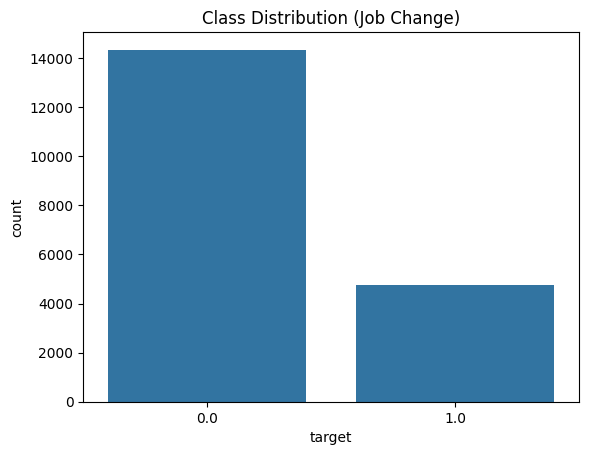

In [106]:
# Check class balance
sns.countplot(x='target', data=df)
plt.title("Class Distribution (Job Change)")
plt.show()


In [107]:
df.to_csv("cleaned_data.csv", index=False)

## Model Development


In [108]:
X = df.drop(columns=["target","company_size"])
y = df["target"]

In [109]:
scaler = StandardScaler()

In [110]:
X = scaler.fit_transform(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [112]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [113]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample'),
    'XGBoost': XGBClassifier(scale_pos_weight=np.sum(y==0)/np.sum(y==1),
                            use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(class_weight='balanced', objective='binary')
}

In [114]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\n\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.7197068830149176
ROC AUC: 0.7612245555033579
Confusion Matrix:
 [[2108  760]
 [ 311  642]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.74      0.80      2868
         1.0       0.46      0.67      0.55       953

    accuracy                           0.72      3821
   macro avg       0.66      0.70      0.67      3821
weighted avg       0.77      0.72      0.73      3821



Model: Random Forest
Accuracy: 0.7770217220622874
ROC AUC: 0.7802205762906831
Confusion Matrix:
 [[2446  422]
 [ 430  523]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      2868
         1.0       0.55      0.55      0.55       953

    accuracy                           0.78      3821
   macro avg       0.70      0.70      0.70      3821
weighted avg       0.78      0.78      0.78      3821



Model: XGBoost
Accuracy: 0.76419785396

In [115]:
importances = RandomForestClassifier.feature_importances_
features = [f'Feature_{i}' for i in range(X_train.shape[1])]
importances = np.ravel(importances)

[LightGBM] [Info] Number of positive: 11473, number of negative: 11473
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2360
[LightGBM] [Info] Number of data points in the train set: 22946, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


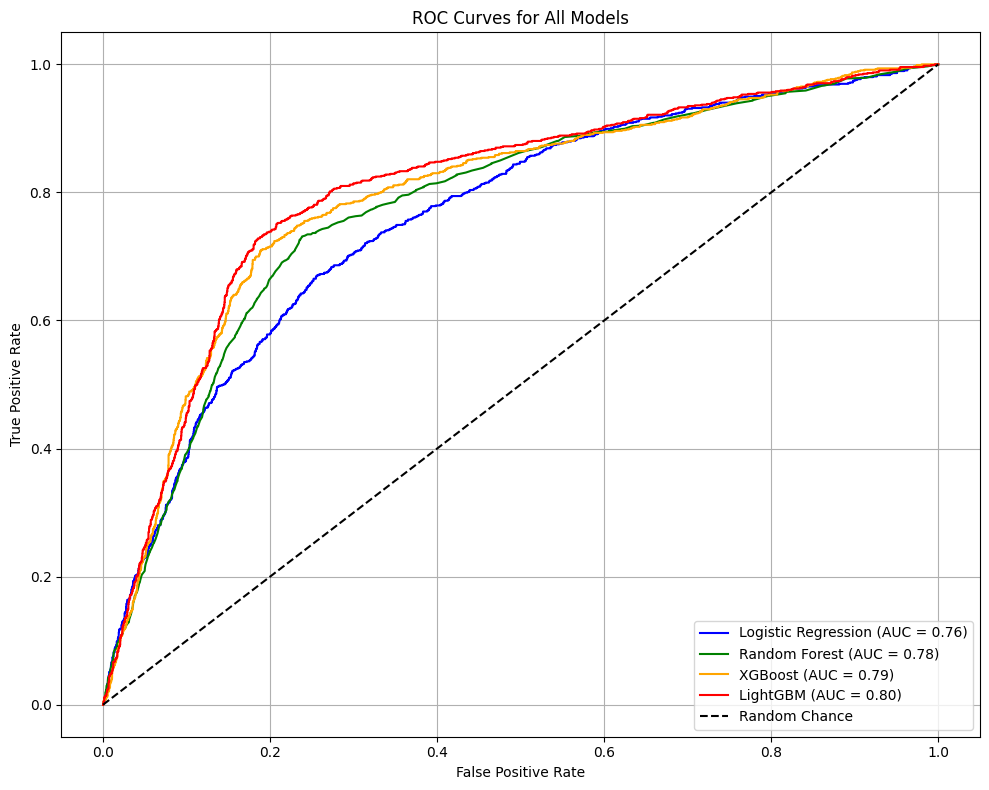

In [116]:
colors = ['blue', 'green', 'orange', 'red']  # Assign a color for each model

plt.figure(figsize=(10, 8))

for (name, model), color in zip(models.items(), colors):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})", color=color)

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


## **Future Scope**
* **Model Deployment in Real-Time HR Systems-**
>Integrate the model into HR tools to provide instant predictions about which employees are at risk of leaving, enabling proactive retention strategies.

* **More Sophisticated Feature Engineering-**
> Generate interaction features (e.g., experience × company size).
> Use NLP techniques on job descriptions (if available) for richer inputs.
>Time-based features for modeling employee tenure more accurately.

* **Ensemble Stacking or Blending-**
>Improve prediction accuracy by combining multiple models (e.g., stacking Logistic Regression, XGBoost, and LightGBM).

* **Continuous Model Retraining-**
>Set up automated retraining pipelines as new data (e.g., from employee feedback or exit surveys) becomes available.

* **Geographic or Department-Wise Risk Segmentation**
>Extend the model to give department- or location-specific attrition risks and recommendations.

* **Integration with External Datasets**
>Include external job market trends, company reviews (e.g., Glassdoor), or macroeconomic factors that influence employee decisions.

## References


SMOTE: Synthetic Minority Over-sampling Technique

Chawla, N.V., Bowyer, K.W., Hall, L.O., & Kegelmeyer, W.P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, 321-357.

https://arxiv.org/abs/1106.1813

XGBoost

Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.

https://doi.org/10.1145/2939672.2939785

LightGBM

Ke, G., Meng, Q., Finley, T., Wang, T., Chen, W., Ma, W., ... & Liu, T.Y. (2017). LightGBM: A Highly Efficient Gradient Boosting Decision Tree. NeurIPS.

https://papers.nips.cc/paper_files/paper/2017/hash/6449f44a102fde848669bdd9eb6b76fa-Abstract.html

SHAP (SHapley Additive exPlanations)

Lundberg, S.M., & Lee, S.I. (2017). A Unified Approach to Interpreting Model Predictions. Advances in Neural Information Processing Systems.

https://github.com/slundberg/shap

Scikit-learn Documentation

https://scikit-learn.org/stable/user_guide.html

Source for machine learning algorithms, pipelines, preprocessing, evaluation metrics